# WINE QUALITY PREDICTION MODEL


In [1]:
## Keerat Kaur Jassal, IITG

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Exploring Dataset and its features


In [3]:
data=pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above data description we can conclude that value of density is almost similar throughout the dataset, because mean, min, 25%, 50%, 75% are all ~0.99.

So I am choosing to drop density feature as it will not have much significance in predicting quality of wine.

In [6]:
data.drop(labels='density', axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
 10  quality               1599 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 137.5 KB


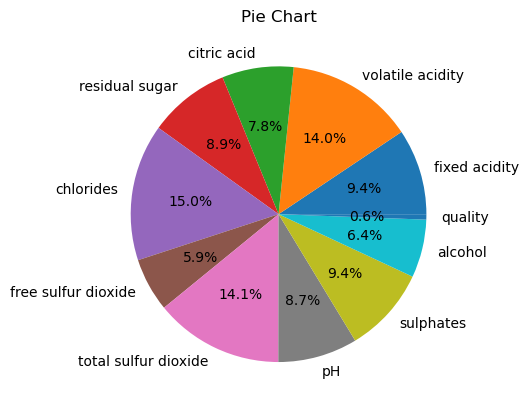

In [8]:
# Count the number of unique values in each column
counts = []
for col in data.columns:
    counts.append(len(data[col].value_counts()))

# Plot a pie chart of the counts
plt.pie(counts, labels=data.columns, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()

# Checking for null values

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Hence,no null values to remove

# Outlier Detection

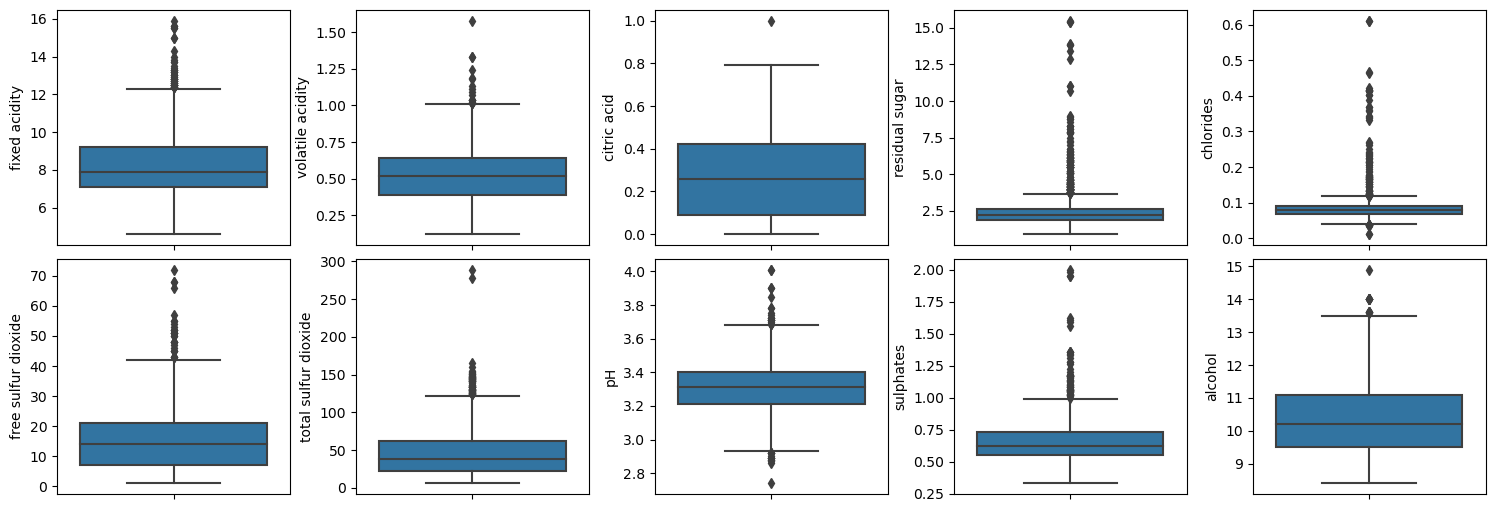

In [10]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in data.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=data, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

Based on the box plots, it is evident that there are outliers in all the features. However, I have decided not to remove or modify the outliers in the dataset, as we are striving for a high degree of accuracy.<br>
It is possible that high-quality wine has a unique composition that is rare and deviates from the average quality wines, resulting in outliers. Therefore, we cannot afford to remove or modify these outlier values in our dataset.

# Feature Extraction

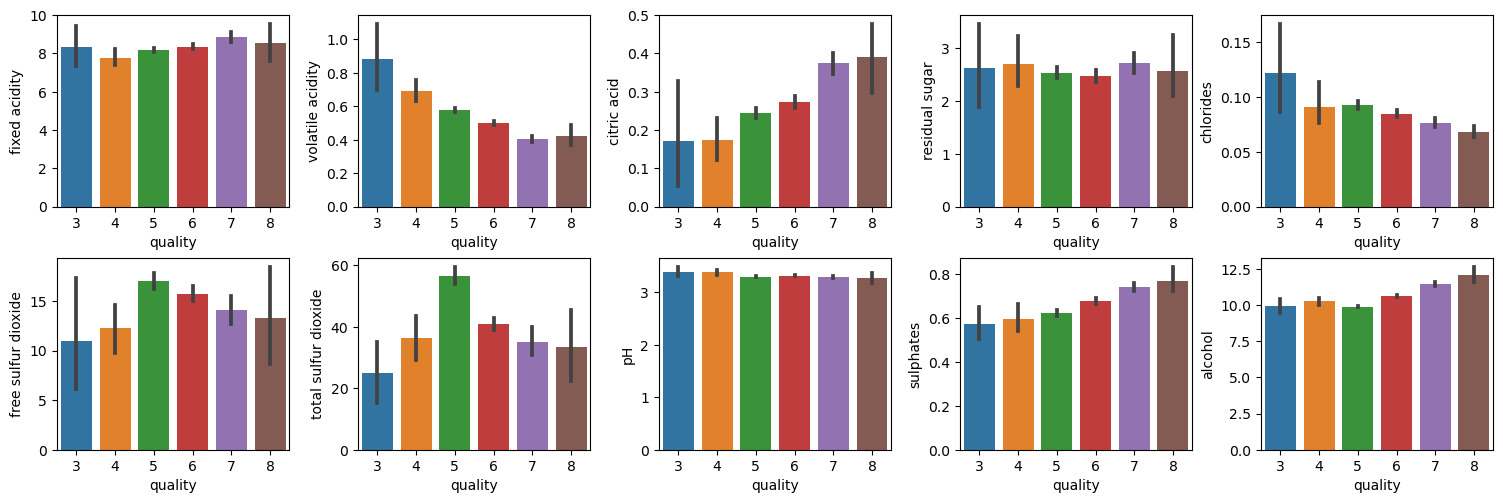

In [11]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(15,5))
ax=ax.flatten()
index=0
for i in data.columns:
    if i!='quality':
        sns.barplot(x='quality',y=i,data=data,ax=ax[index])
        index+=1
plt.tight_layout(pad=0.6)
plt.show()

Quality increases with:<br>
-Decrease in volatile acidity , chlorides , pH . <br>
-Increase in citric acid , sulphates , alcohol



<AxesSubplot:>

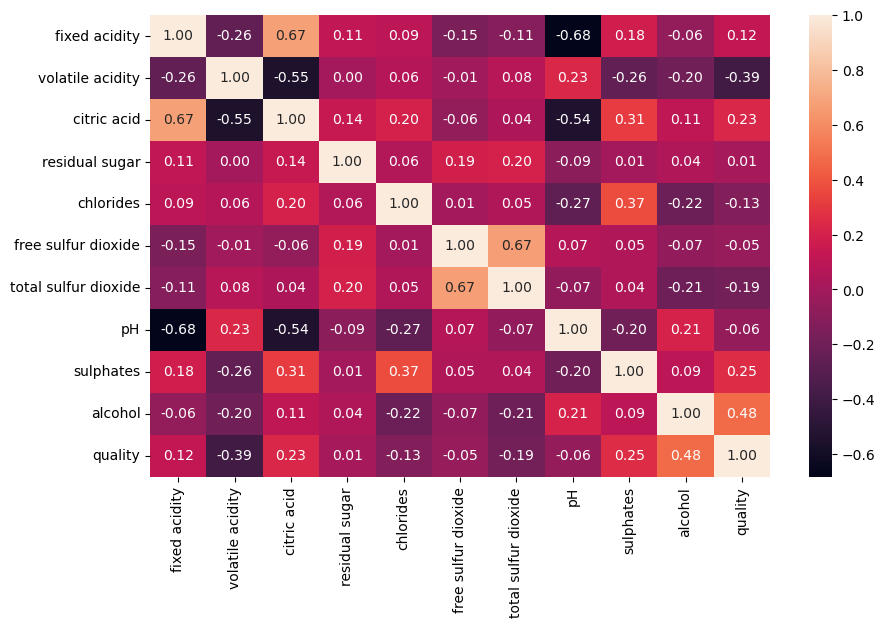

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,fmt='0.2f')

From the above plots and values we can conclude:

-Volatile acidity, chlorides and ph are negatively correlated to quality,hence our above statement was right that quality increases with decrease in value of these features
<br>-Free sulfur dioxide and total sulfur dioxide;Fixed acidity and citric acid are highly correlated to each other with correlation of 0.67.

Features having a correlation <0.5 with quality may be removed from the dataset,but for better accuracy we will keep them.

# Binarization of Target Variable

#Create Classification version of target variable <br>
Now we will divide the quality of wine as follows:

Bad wine (0): range 1 - 6.5 <br>
Good wine (1): range 6.5 - 10 <br>
This can be changed as per the requiremnt of our client.

In [13]:
data['quality']=[1 if x>=6.5 else 0 for x in data['quality']]

In [14]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Handling Imbalanced data

<AxesSubplot:xlabel='quality', ylabel='count'>

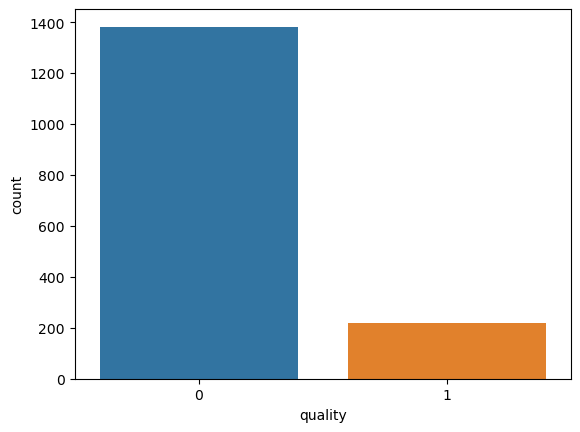

In [15]:
sns.countplot(data['quality'])

From the above plot, we can conclude that the dataset is imbalanced <br>
It is very important at this stage to handle this imbalanced dataset. I will be using oversampling technique since undersampling will result in the loss of a lot of valuable data.I will perform oversampling technique using SMOTE


In [16]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [17]:
X=data.drop('quality',axis=1)
Y=data['quality']

In [18]:
from imblearn.over_sampling import SMOTE
X,Y=SMOTE().fit_resample(X,Y)

# Training and Test Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)

(2211, 10)
(553, 10)


In [22]:
print(Y_train.shape)
print(Y_test.shape)

(2211,)
(553,)


# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
s=StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

# PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA(n_components=0.95)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [27]:
pca.explained_variance_ratio_

array([0.29161864, 0.17867159, 0.14557723, 0.11103216, 0.09494461,
       0.0523421 , 0.04920204, 0.03319892])

In [28]:
sum(pca.explained_variance_ratio_)

0.956587290898962

The input to PCA algorithm is 11 components,and output is 8 components so we can say that 8 components are able to retain 95% of information of larger dataset.

# Applying ML MODELS

Since this is a classification problem,hence we will use different classification predictive models.

## 1.Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [31]:
Y_pred_LR = log.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [33]:
print('Confussion matrix:')
print(CM(Y_test,Y_pred_LR))

Confussion matrix:
[[228  63]
 [ 34 228]]


In [34]:
print(classification_report(Y_test,Y_pred_LR))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       291
           1       0.78      0.87      0.82       262

    accuracy                           0.82       553
   macro avg       0.83      0.83      0.82       553
weighted avg       0.83      0.82      0.82       553



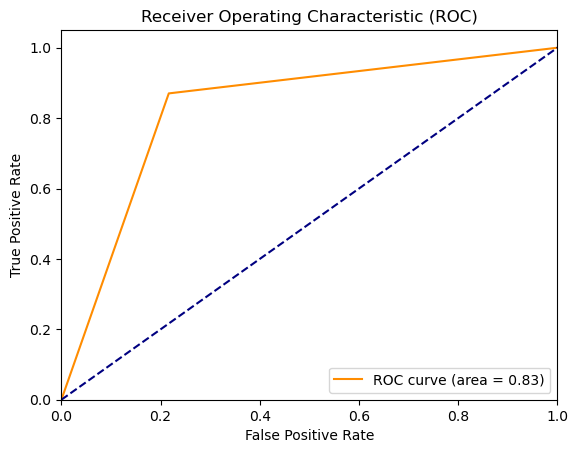

In [35]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_LR)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='navy',linestyle='--') # plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## 2.SVC

In [36]:
from sklearn import svm

In [37]:
svm=svm.SVC()

In [38]:
svm.fit(X_train,Y_train)

SVC()

In [39]:
Y_pred_SVM=svm.predict(X_test)

In [40]:
print('Confussion matrix:')
print(CM(Y_test,Y_pred_SVM))

Confussion matrix:
[[242  49]
 [ 26 236]]


In [41]:
print(classification_report(Y_test,Y_pred_SVM))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       291
           1       0.83      0.90      0.86       262

    accuracy                           0.86       553
   macro avg       0.87      0.87      0.86       553
weighted avg       0.87      0.86      0.86       553



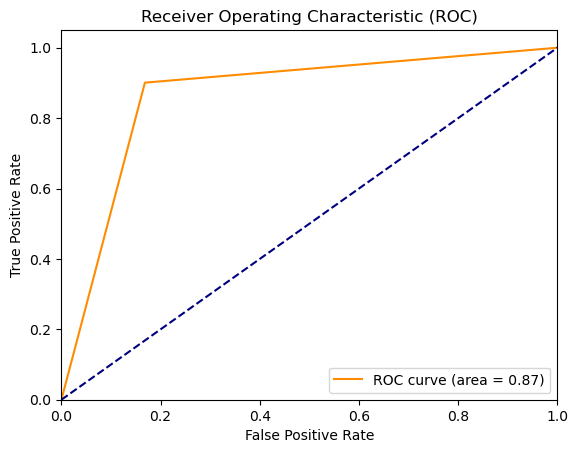

In [42]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_SVM)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='navy',linestyle='--') # plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## 3.K-Nearest Neighbour Classification

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier()

In [45]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [46]:
Y_pred_KNN=knn.predict(X_test)

In [47]:
print('Confussion matrix:')
print(CM(Y_test,Y_pred_KNN))

Confussion matrix:
[[230  61]
 [  4 258]]


In [48]:
print(classification_report(Y_test,Y_pred_KNN))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       291
           1       0.81      0.98      0.89       262

    accuracy                           0.88       553
   macro avg       0.90      0.89      0.88       553
weighted avg       0.90      0.88      0.88       553



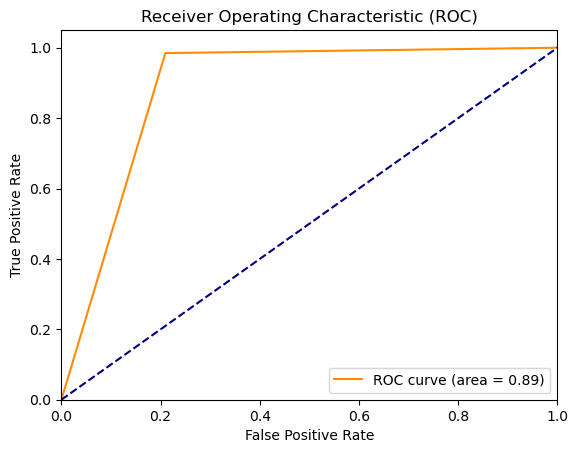

In [49]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_KNN)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='navy',linestyle='--') # plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## 4.Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt=DecisionTreeClassifier()

In [52]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [53]:
Y_pred_DT=dt.predict(X_test)

In [54]:
print('Confussion matrix:')
print(CM(Y_test,Y_pred_DT))

Confussion matrix:
[[252  39]
 [ 27 235]]


In [55]:
print(classification_report(Y_test,Y_pred_DT))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       291
           1       0.86      0.90      0.88       262

    accuracy                           0.88       553
   macro avg       0.88      0.88      0.88       553
weighted avg       0.88      0.88      0.88       553



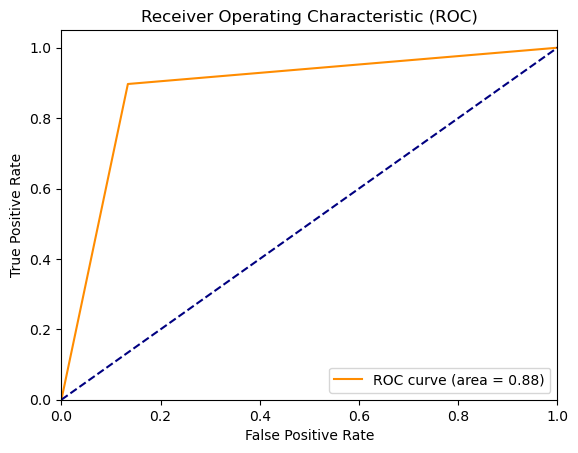

In [56]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_DT)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='navy',linestyle='--') # plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## 5.Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf=RandomForestClassifier()

In [59]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [60]:
Y_pred_RF=rf.predict(X_test)

In [61]:
print('Confussion matrix:')
print(CM(Y_test,Y_pred_RF))

Confussion matrix:
[[264  27]
 [ 11 251]]


In [62]:
print(classification_report(Y_test,Y_pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       291
           1       0.90      0.96      0.93       262

    accuracy                           0.93       553
   macro avg       0.93      0.93      0.93       553
weighted avg       0.93      0.93      0.93       553



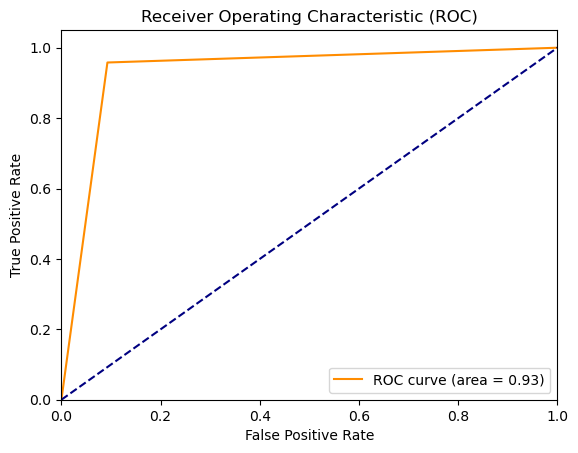

In [63]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_RF)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='navy',linestyle='--') # plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## 6.Naive Bayes Classifier

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
nb=GaussianNB()

In [66]:
nb.fit(X_train,Y_train)

GaussianNB()

In [67]:
Y_pred_NB=nb.predict(X_test)

In [68]:
print('Confussion matrix:')
print(CM(Y_test,Y_pred_NB))

Confussion matrix:
[[207  84]
 [ 27 235]]


In [69]:
print(classification_report(Y_test,Y_pred_NB))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79       291
           1       0.74      0.90      0.81       262

    accuracy                           0.80       553
   macro avg       0.81      0.80      0.80       553
weighted avg       0.81      0.80      0.80       553



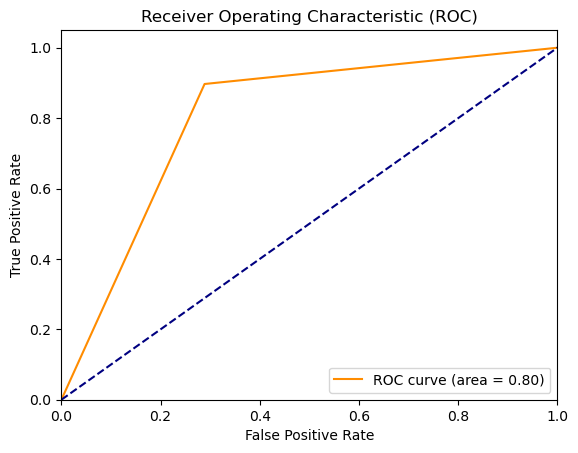

In [70]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_NB)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='navy',linestyle='--') # plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## 7.Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gb=GradientBoostingClassifier()

In [73]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [74]:
Y_pred_GB=gb.predict(X_test)

In [75]:
print('Confussion matrix:')
print(CM(Y_test,Y_pred_GB))

Confussion matrix:
[[256  35]
 [ 19 243]]


In [76]:
print(classification_report(Y_test,Y_pred_GB))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       291
           1       0.87      0.93      0.90       262

    accuracy                           0.90       553
   macro avg       0.90      0.90      0.90       553
weighted avg       0.90      0.90      0.90       553



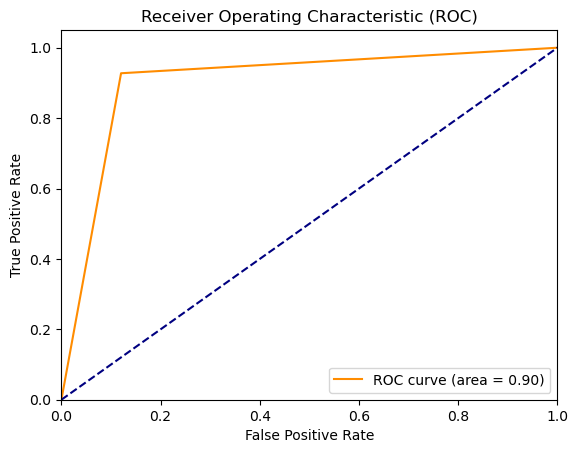

In [77]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_GB)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],color='navy',linestyle='--') # plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Checking accuracy of different classification models

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
#K-fold cross validation

modelNames = ['LR', 'SVC', 'KNN','DT','RF','NB','GB']
modelClassifiers = [log, svm, knn, dt, rf , nb , gb]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, X_train, Y_train, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1

Accuracy of LR Classification model is 0.80
Accuracy of SVC Classification model is 0.87
Accuracy of KNN Classification model is 0.88
Accuracy of DT Classification model is 0.90
Accuracy of RF Classification model is 0.93
Accuracy of NB Classification model is 0.77
Accuracy of GB Classification model is 0.89


# Visualization to find best model

In [80]:
res=pd.DataFrame({'Model' : modelNames,'Accuracy Score' : score})

In [81]:
res

,Model,Accuracy Score
0,LR,0.803712
1,SVC,0.865224
2,KNN,0.879243
3,DT,0.895981
4,RF,0.933068
5,NB,0.773403
6,GB,0.891910


<AxesSubplot:xlabel='Model', ylabel='Accuracy Score'>

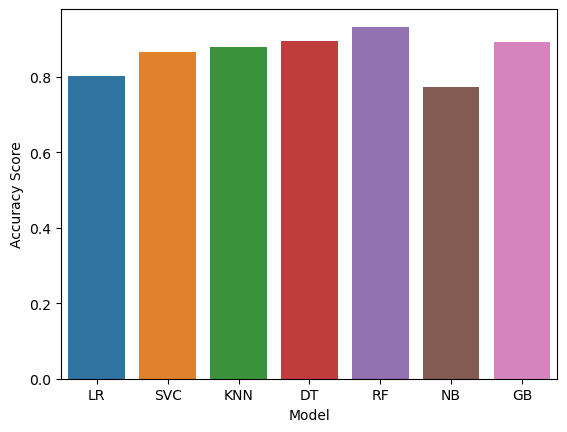

In [82]:
sns.barplot(x=res['Model'],y=res['Accuracy Score'])

From above Barplot we are able to visualise that Random Forest Classifier gives us the best accuracy out of all the models,hence we will go forth with Random Forest

Comparision can also be done by comparing the values of accuracy_score(Y_test,Y_pred) for each model

# Hyperparameter Tunning

In [83]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# Define the hyperparameters to search
params= {
  #  'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [86]:
# Create a RandomForestClassifier instance
rf=RandomForestClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(rf, param_grid=params, cv=5,scoring='accuracy',n_jobs=-1)

# Fit the GridSearchCV instance to the data
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [87]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
print(grid_search.best_estimator_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.9303575988478393
RandomForestClassifier()


In [88]:
rf= RandomForestClassifier(**grid_search.best_params_)
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [89]:
Y_pred_GS = rf.predict(X_test)

In [90]:
print(classification_report(Y_test,Y_pred_GS ))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       291
           1       0.91      0.98      0.94       262

    accuracy                           0.94       553
   macro avg       0.94      0.95      0.94       553
weighted avg       0.95      0.94      0.94       553



We can see that on hyperparameter tuning,the accuracy increased by 1% 

# Saving the model

In [91]:
# scaling the whole data
X=s.fit_transform(X)

In [92]:
# performing PCA on whole data
X=pca.fit_transform(X)

In [93]:
rf.fit(X,Y)

RandomForestClassifier()

In [94]:
import joblib

In [95]:
joblib.dump(rf,'Wine Quality Prediction')

['Wine Quality Prediction']

In [96]:
model=joblib.load('Wine Quality Prediction')

# GUI

In [97]:
from tkinter import *

In [98]:
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get()) 
    p10=float(e10.get())
    
    model = joblib.load('Wine Quality Prediction')
    result=model.predict(pca.transform(s.transform([[p1,p2,p3,p4,p5,p6,
                           p7,p8,p9,p10]])))
    
    if result[0] == 0:
        Label(master, text="Bad Quality Wine").grid(row=31)
    else:
        Label(master, text="Good Quality Wine").grid(row=31)
    
    
master = Tk()
master.title("Wine Quality Prediction")


Label(master, text="fixed acidity").grid(row=1)
Label(master, text="volatile acidity").grid(row=2)
Label(master, text="citric acid").grid(row=3)
Label(master, text="residual sugar").grid(row=4)
Label(master, text="chlorides").grid(row=5)
Label(master, text="free sulfur dioxide").grid(row=6)
Label(master, text="total sulfur dioxide").grid(row=7)
Label(master, text="pH").grid(row=8)
Label(master, text="sulphates").grid(row=9)
Label(master,text="alcohol").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()